In [3]:
import statistics

# Base Employee class
class Employee:
    def __init__(self, name, emp_id, department):
        self.name = name
        self.emp_id = emp_id
        self.department = department
        self.performance_scores = []  # To track employee performance over time

    def add_performance_score(self, score):
        self.performance_scores.append(score)

    def calculate_salary(self):
        raise NotImplementedError("This method should be overridden by subclasses")

    # Descriptive statistics for performance
    def calculate_mean_performance(self):
        return statistics.mean(self.performance_scores) if self.performance_scores else 0

    def calculate_median_performance(self):
        return statistics.median(self.performance_scores) if self.performance_scores else 0

    def calculate_mode_performance(self):
        try:
            return statistics.mode(self.performance_scores)
        except statistics.StatisticsError:
            return "No mode (all scores are unique)"


# Full-time Employee class
class FullTimeEmployee(Employee):
    def __init__(self, name, emp_id, department, base_salary):
        super().__init__(name, emp_id, department)
        self.base_salary = base_salary

    def calculate_salary(self):
        return self.base_salary


# Part-time Employee class
class PartTimeEmployee(Employee):
    def __init__(self, name, emp_id, department, hourly_rate, hours_worked):
        super().__init__(name, emp_id, department)
        self.hourly_rate = hourly_rate
        self.hours_worked = hours_worked

    def calculate_salary(self):
        return self.hourly_rate * self.hours_worked


# Contract Employee class
class ContractEmployee(Employee):
    def __init__(self, name, emp_id, department, contract_fee):
        super().__init__(name, emp_id, department)
        self.contract_fee = contract_fee

    def calculate_salary(self):
        return self.contract_fee
# Create a full-time employee
john = FullTimeEmployee("John Doe", 101, "Engineering", 5000)
john.add_performance_score(80)
john.add_performance_score(90)
john.add_performance_score(85)

# Calculate salary and performance statistics
print("John's Salary:", john.calculate_salary())
print("John's Mean Performance:", john.calculate_mean_performance())
print("John's Median Performance:", john.calculate_median_performance())
print("John's Mode Performance:", john.calculate_mode_performance())


John's Salary: 5000
John's Mean Performance: 85
John's Median Performance: 85
John's Mode Performance: 80


In [4]:
import statistics
import numpy as np  # For covariance and correlation

# Base Employee class
class Employee:
    def __init__(self, name, emp_id, department):
        self.name = name
        self.emp_id = emp_id
        self.department = department
        self.performance_scores = []  # To track employee performance over time

    def add_performance_score(self, score):
        self.performance_scores.append(score)

    def calculate_salary(self):
        raise NotImplementedError("This method should be overridden by subclasses")

    # Descriptive statistics for performance
    def calculate_mean_performance(self):
        return statistics.mean(self.performance_scores) if self.performance_scores else 0

    def calculate_median_performance(self):
        return statistics.median(self.performance_scores) if self.performance_scores else 0

    def calculate_mode_performance(self):
        try:
            return statistics.mode(self.performance_scores)
        except statistics.StatisticsError:
            return "No mode (all scores are unique)"

# Department class
class Department:
    def __init__(self, name):
        self.name = name
        self.employees = []

    def add_employee(self, employee):
        self.employees.append(employee)

    def department_performance_scores(self):
        scores = []
        for employee in self.employees:
            scores.extend(employee.performance_scores)
        return scores

    def calculate_department_mean_performance(self):
        scores = self.department_performance_scores()
        return statistics.mean(scores) if scores else 0

# Function to calculate covariance between two departments
def calculate_covariance(department1, department2):
    scores1 = department1.department_performance_scores()
    scores2 = department2.department_performance_scores()

    if len(scores1) == len(scores2) and len(scores1) > 1:
        return np.cov(scores1, scores2)[0][1]
    else:
        return "Insufficient or unequal data for covariance calculation"

# Function to calculate correlation between two departments
def calculate_correlation(department1, department2):
    scores1 = department1.department_performance_scores()
    scores2 = department2.department_performance_scores()

    if len(scores1) == len(scores2) and len(scores1) > 1:
        return np.corrcoef(scores1, scores2)[0][1]
    else:
        return "Insufficient or unequal data for correlation calculation"

# Full-time Employee class
class FullTimeEmployee(Employee):
    def __init__(self, name, emp_id, department, base_salary):
        super().__init__(name, emp_id, department)
        self.base_salary = base_salary

    def calculate_salary(self):
        return self.base_salary

# Part-time Employee class
class PartTimeEmployee(Employee):
    def __init__(self, name, emp_id, department, hourly_rate, hours_worked):
        super().__init__(name, emp_id, department)
        self.hourly_rate = hourly_rate
        self.hours_worked = hours_worked

    def calculate_salary(self):
        return self.hourly_rate * self.hours_worked

# Contract Employee class
class ContractEmployee(Employee):
    def __init__(self, name, emp_id, department, contract_fee):
        super().__init__(name, emp_id, department)
        self.contract_fee = contract_fee

    def calculate_salary(self):
        return self.contract_fee
# Create departments
engineering = Department("Engineering")
marketing = Department("Marketing")

# Create employees and assign to departments
john = FullTimeEmployee("John Doe", 101, "Engineering", 5000)
john.add_performance_score(80)
john.add_performance_score(85)

alice = FullTimeEmployee("Alice Smith", 102, "Marketing", 4500)
alice.add_performance_score(70)
alice.add_performance_score(75)

# Add employees to departments
engineering.add_employee(john)
marketing.add_employee(alice)

# Calculate covariance and correlation between departments
print("Covariance between Engineering and Marketing:", calculate_covariance(engineering, marketing))
print("Correlation between Engineering and Marketing:", calculate_correlation(engineering, marketing))


Covariance between Engineering and Marketing: 12.5
Correlation between Engineering and Marketing: 0.9999999999999999


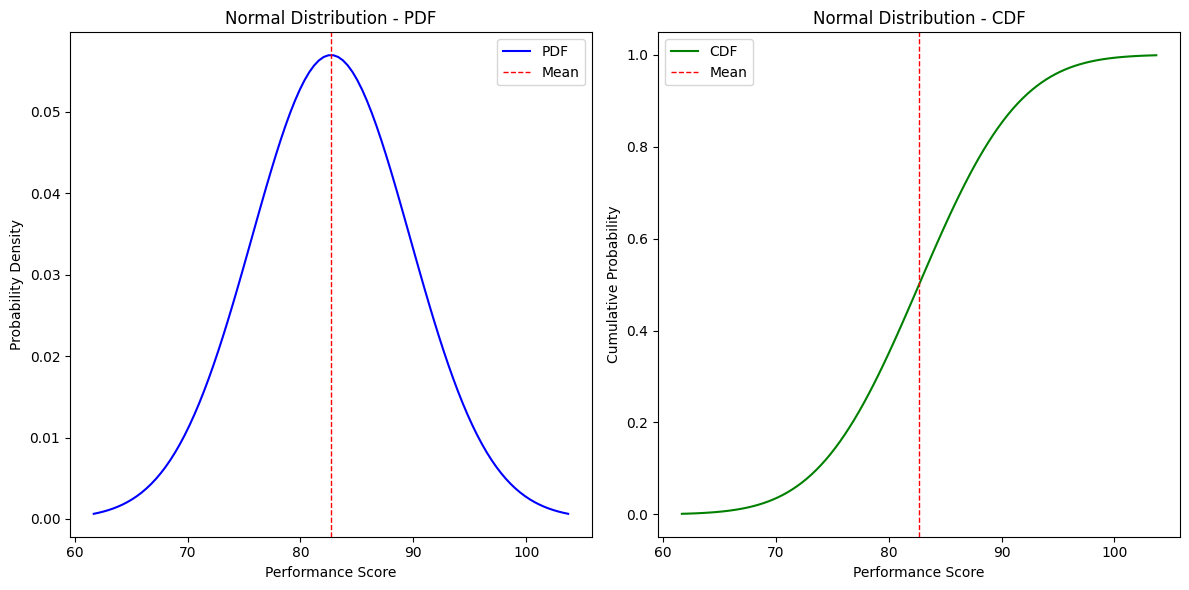

Probability of 7 successes in 10 trials: 0.26682793200000005


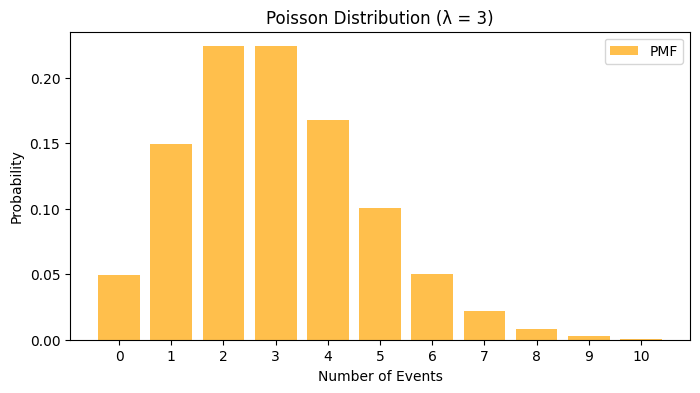

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to analyze normal distribution of performance scores
def analyze_normal_distribution(performance_scores):
    mean = np.mean(performance_scores)
    std_dev = np.std(performance_scores)

    # Generate x values for the PDF
    x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)

    # Calculate the PDF
    pdf = stats.norm.pdf(x, mean, std_dev)

    # Calculate the CDF
    cdf = stats.norm.cdf(x, mean, std_dev)

    # Plotting the results
    plt.figure(figsize=(12, 6))

    # PDF plot
    plt.subplot(1, 2, 1)
    plt.plot(x, pdf, color='blue', label='PDF')
    plt.title('Normal Distribution - PDF')
    plt.xlabel('Performance Score')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.legend()

    # CDF plot
    plt.subplot(1, 2, 2)
    plt.plot(x, cdf, color='green', label='CDF')
    plt.title('Normal Distribution - CDF')
    plt.xlabel('Performance Score')
    plt.ylabel('Cumulative Probability')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to model binomial distribution
def analyze_binomial_distribution(trials, success_prob, num_successes):
    # Calculate the probability of getting num_successes in trials
    probability = stats.binom.pmf(num_successes, trials, success_prob)
    print(f"Probability of {num_successes} successes in {trials} trials: {probability}")

# Function to model Poisson distribution
def analyze_poisson_distribution(lambd, x_values):
    # Generate the Poisson PMF values
    pmf = stats.poisson.pmf(x_values, lambd)

    # Plotting the Poisson distribution
    plt.figure(figsize=(8, 4))
    plt.bar(x_values, pmf, color='orange', alpha=0.7, label='PMF')
    plt.title(f'Poisson Distribution (λ = {lambd})')
    plt.xlabel('Number of Events')
    plt.ylabel('Probability')
    plt.xticks(x_values)
    plt.legend()
    plt.show()

# Example Usage
# Performance scores from employees in a department
performance_scores = [80, 85, 90, 78, 82, 95, 88, 70, 75, 84]

# Analyzing normal distribution
analyze_normal_distribution(performance_scores)

# Analyzing binomial distribution
trials = 10  # Total number of employees evaluated
success_prob = 0.7  # Probability of success (meeting performance criteria)
num_successes = 7  # Number of successes we're interested in
analyze_binomial_distribution(trials, success_prob, num_successes)

# Analyzing Poisson distribution
lambd = 3  # Average number of events (e.g., high-performing employees)
x_values = np.arange(0, 11)  # Possible number of events
analyze_poisson_distribution(lambd, x_values)
